In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Задача на 6-ом шаге урока

In [137]:
path = '../data/stratified_valid_2.csv'
df = pd.read_csv(path)

In [138]:
df.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN


In [151]:
from sklearn.model_selection import StratifiedKFold
import random

# Для тренировочного датасета сгенерируйте 10 номеров фолдов (от 0 и до 9) так, 
# чтобы в каждом фолде среднее значение регрессионного таргета было примерно одинаковым. 
# Номер фолда запишите в новый столбец num_fold. 
# Допускается разброс значений таргета между фолдами = 350 у.е

N = 10

# Создаем бины, иначе стратификатор не сработает
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels=[f'group_{i}' for i in range(N)])

# Создаем итератор для фолдов
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=111)
y = df['target_reg_group']
df['num_fold'] = None

# Запускаем итератор, указав группы таргета для стратификации
for i, (train_index, test_index) in enumerate(skf.split(X=df, y=df['target_reg_group'])):
    df.loc[test_index, 'num_fold'] = i

# Сохраняем ответ
df[['car_id', 'target_reg', 'num_fold']].to_csv('../subs/answer_task1.csv', index=False)

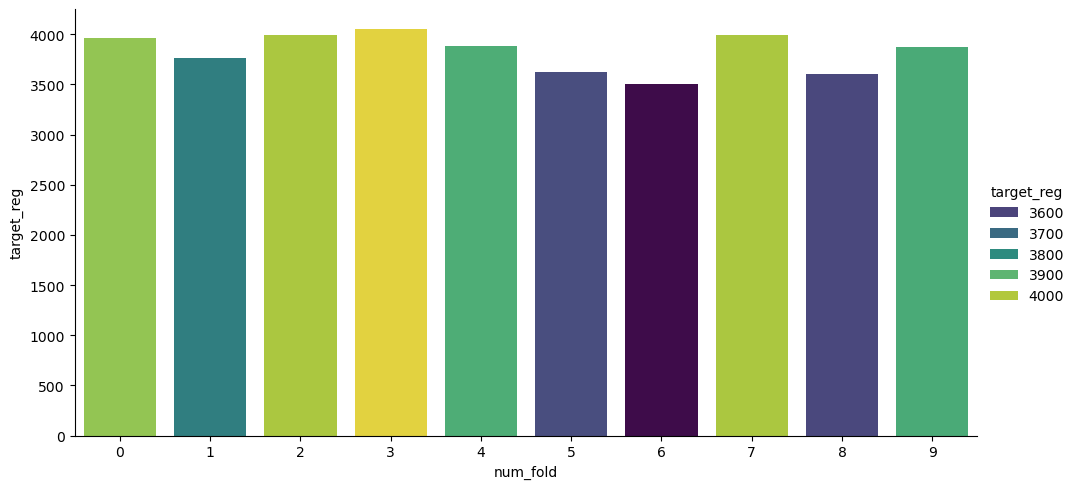

In [152]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', hue='target_reg', aspect=2, kind="bar", palette='viridis');

In [153]:
# Код для подсчета метрики
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

189.9927821195881

# Задача на 7-ом шаге урока

In [ ]:
# Вспомогательная библиотека для решения
# Документация: https://github.com/trent-b/iterative-stratification

In [ ]:
# !pip install iterative-stratification -q

In [155]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [168]:
path = '../data/multi_label_2.csv'
df = pd.read_csv(path)

In [169]:
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0


In [170]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']

In [ ]:
N = 4

# Создаем итератор для фолдов
skf = MultilabelStratifiedKFold(n_splits=N, shuffle=True, random_state=111)
X = df
y = df[targets]
df['kfold'] = None

# Запускаем итератор, указав группы таргета для стратификации
for i, (train_index, test_index) in enumerate(skf.split(X=X, y=y)):
    df.loc[test_index, 'kfold'] = i

# Сохраняем ответ
df.to_csv('../subs/answer_task2.csv', index=False)

In [172]:
# Для тренировочного датасета сгенерируйте 5 фолдов (от 0 и до 4) так, 
# чтобы в каждом фолде число всех классов было примерно одинаковым (сбалансированным). 
# Номер фолда запишите в новый столбец kfold.
# Допускается средний разброс значений таргета между фолдами хотя бы = 9.5 у.е.

In [173]:
tmp = df.groupby(['kfold'], as_index=False).sum()
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.44245008972987815


In [ ]:
# Для того чтобы сверять csv файл с ответом, нажми на ярлык папки в панели инструментов которая слева,
# далее ПКМ на название файла
# Не забудьте index=False при сохранении результата в csv формате

# df.to_csv('answer_task2.csv')